# STEP 6: Calculate zonal statistics

In order to evaluate the connection between vegetation health and
redlining, we need to summarize NDVI across the same geographic areas as
we have redlining information.

First, import variables from previous notebooks:

In [32]:
store -r denver_redlining_gdf ndvi_da

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import packages</div></div><div class="callout-body-container callout-body"><p>Some packages are included that will help you calculate statistics
for areas imported below. Add packages for:</p>
<ol type="1">
<li>Interactive plotting of tabular and vector data</li>
<li>Working with categorical data in <code>DataFrame</code>s</li>
</ol></div></div>

In [37]:
# Interactive plots with pandas
import hvplot.pandas
# Ordered categorical data
import pandas as pd 

# geospatial xarray extension powered by rasterio for rio accessor
import rioxarray

import regionmask # Convert shapefile to mask
from xrspatial import zonal_stats # Calculate zonal statistics
import cartopy.crs as ccrs # CRSs

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Convert vector to raster</div></div><div class="callout-body-container callout-body"><p>You can convert your vector data to a raster mask using the
<code>regionmask</code> package. You will need to give
<code>regionmask</code> the geographic coordinates of the grid you are
using for this to work:</p>
<ol type="1">
<li>Replace <code>gdf</code> with your redlining
<code>GeoDataFrame</code>.</li>
<li>Add code to put your <code>GeoDataFrame</code> in the same CRS as
your raster data.</li>
<li>Replace <code>x_coord</code> and <code>y_coord</code> with the x and
y coordinates from your raster data.</li>
</ol></div></div>

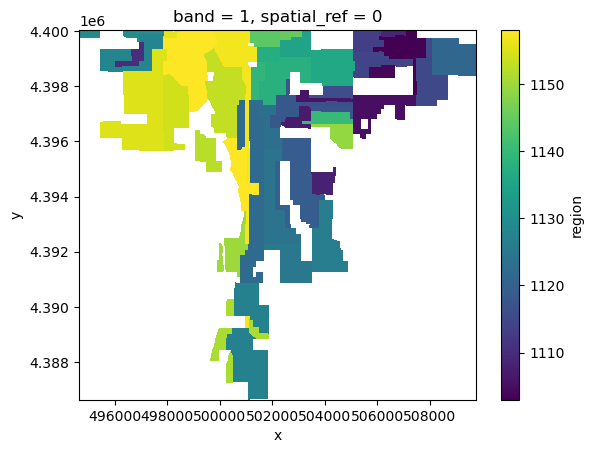

In [38]:
denver_redlining_mask = regionmask.mask_geopandas(
    denver_redlining_gdf.to_crs(ndvi_da.rio.crs), 
    ndvi_da.x, # meters
    ndvi_da.y, # meters 
    # The regions do not overlap bc no lat/long coords
    overlap=False,
    # We're not using geographic coordinates
    wrap_lon=False
)

denver_redlining_mask.plot()

In [39]:
denver_redlining_mask

<xarray.DataArray 'mask' (y: 447, x: 504)> Size: 2MB
array([[  nan, 1129., 1129., ...,   nan,   nan,   nan],
       [  nan, 1129., 1129., ...,   nan,   nan,   nan],
       [  nan, 1129., 1129., ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])
Coordinates:
    band         int64 8B 1
  * y            (y) float64 4kB 4.4e+06 4.4e+06 4.4e+06 ... 4.387e+06 4.387e+06
    spatial_ref  int64 8B 0
  * x            (x) float64 4kB 4.947e+05 4.947e+05 ... 5.097e+05 5.097e+05
Attributes:
    standard_name:  region

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Calculate zonal statistics</div></div><div class="callout-body-container callout-body"><p>Calculate zonal status using the <code>zonal_stats()</code> function.
To figure out which arguments it needs, use either the
<code>help()</code> function in Python, or search the internet.</p></div></div>

In [44]:
# Calculate NDVI stats for each redlining zone

denver_ndvi_stats = zonal_stats(zones=denver_redlining_mask, values=ndvi_da)

denver_ndvi_stats.head()

,zone,mean,max,min,sum,std,var,count
0,1103.0,0.694627,0.975424,0.232406,1266.304565,0.083890,0.007037,1823.0
1,1104.0,0.652956,0.800656,0.461446,323.866058,0.058149,0.003381,496.0
2,1105.0,0.659457,0.933401,0.135010,1460.038574,0.103756,0.010765,2214.0
3,1106.0,0.705933,0.895803,0.235602,331.788544,0.070042,0.004906,470.0
4,1107.0,0.672849,0.859561,0.154306,411.783569,0.093026,0.008654,612.0


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot regional statistics</div></div><div class="callout-body-container callout-body"><p>Plot the regional statistics:</p>
<ol type="1">
<li>Merge the NDVI values into the redlining
<code>GeoDataFrame</code>.</li>
<li>Use the code template below to convert the <code>grade</code> column
(<code>str</code> or <code>object</code> type) to an ordered
<code>pd.Categorical</code> type. This will let you use ordered color
maps with the grade data!</li>
<li>Drop all <code>NA</code> grade values.</li>
<li>Plot the NDVI and the redlining grade next to each other in linked
subplots.</li>
</ol></div></div>

In [45]:
# Merge stats on the zone

# zone on denver_redlining_gdf is the index
denver_redlining_gdf.index

Index([1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114,
       1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126,
       1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138,
       1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150,
       1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158],
      dtype='int64')

In [50]:
# Merge the NDVI stats with redlining geometry into one `GeoDataFrame` on zone index
denver_ndvi_gdf = denver_redlining_gdf.merge(denver_ndvi_stats.set_index('zone'), left_index=True, right_index=True)

# Change grade to ordered Categorical for plotting
denver_ndvi_gdf.grade = pd.Categorical(
    denver_ndvi_gdf.grade,
    ordered=True, # the grades are ordered
    categories=['A', 'B', 'C', 'D']
)

# Drop rows with NA grades
denver_ndvi_gdf = denver_ndvi_gdf.dropna(subset=["grade"])

# Plot NDVI and redlining grade in linked subplots
(
    denver_ndvi_gdf.hvplot(
        c='mean',
        geo=True,
        cmap='Greens'
    )
    +
    denver_ndvi_gdf.hvplot(
        c='grade',
        geo=True,
        cmap='cet_rainbow4'
    )
)

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (mean)
   .Polygons.II :Polygons   [Longitude,Latitude]   (grade)

In [51]:
# store variables
%store denver_ndvi_gdf

Stored 'denver_ndvi_gdf' (GeoDataFrame)
